In [1]:
import numpy as np

In [2]:
np.log2(15/30)

-1.0

In [3]:
15/30

0.5

In [4]:
-2/10*np.log2(2/10)-8/10*np.log2(8/10)

0.7219280948873623

In [5]:
-13/20*np.log2(13/20)-7/20*np.log2(7/20)

0.934068055375491

In [6]:
-13/20*np.log2(13/20)-2/10*np.log2(2/10)

0.8683530638625481

In [7]:
-6/14*np.log2(6/14)-9/16*np.log2(9/16)

0.9907996529757485

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data=[[8,8,'dog'],[50,40,'dog'],[8,9,'cat'],['15','12','dog'],[9,9.8,'cat']]

df=pd.DataFrame(data,columns=['Weight','height','label'])

df

,Weight,height,label
0,8,8,dog
1,50,40,dog
2,8,9,cat
3,15,12,dog
4,9,9.8,cat


In [9]:
x=df[['Weight','height']]
y=df['label']

In [10]:
tree=DecisionTreeClassifier()

model=tree.fit(x,y)

In [11]:
tree.predict([[9,8]])

array(['dog'], dtype=object)

#export  graphviz function for display the tree within a jupyter notebook and it converts the decision tree classifier onto dot file 

py

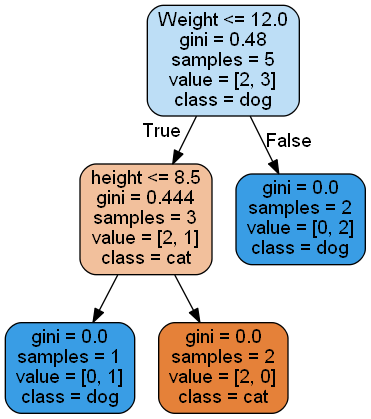

In [12]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data=StringIO()

export_graphviz(model,out_file=dot_data,filled=True,rounded=True,feature_names=x.columns,class_names=['cat','dog'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Zoo Animal Classification

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
animal=pd.read_csv("zoo.csv")
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [15]:
animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [16]:
animal.class_type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [17]:
duplicates=animal.duplicated()
duplicates[duplicates>1]

Series([], dtype: bool)

In [18]:
#check if there are duplicates in animal_name

duplicates=animal.animal_name.value_counts()
duplicates[duplicates>1]

frog    2
Name: animal_name, dtype: int64

In [19]:
frog=animal.loc[animal['animal_name']=='frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [20]:
# Join animal table and class table to show actual table

ani_class=pd.read_csv("class.csv")

df=pd.merge(animal,ani_class,how="left",left_on="class_type",right_on="Class_Number")

df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


C:\Users\RANGA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\RANGA\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


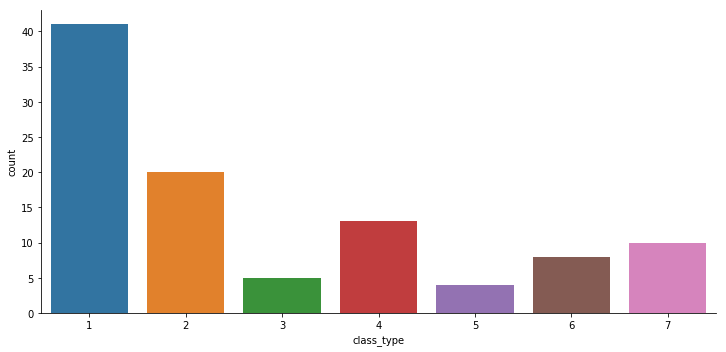

In [21]:
sns.factorplot('class_type',data=df,kind="count",size=5,aspect=2)

In [22]:
from sklearn.model_selection import train_test_split

x=animal.iloc[:,1:17]
y=animal.iloc[:,17]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [23]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
clf=DecisionTreeClassifier(random_state=1,criterion='gini')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [27]:
score=accuracy_score(y_pred,y_test)
score

0.9615384615384616

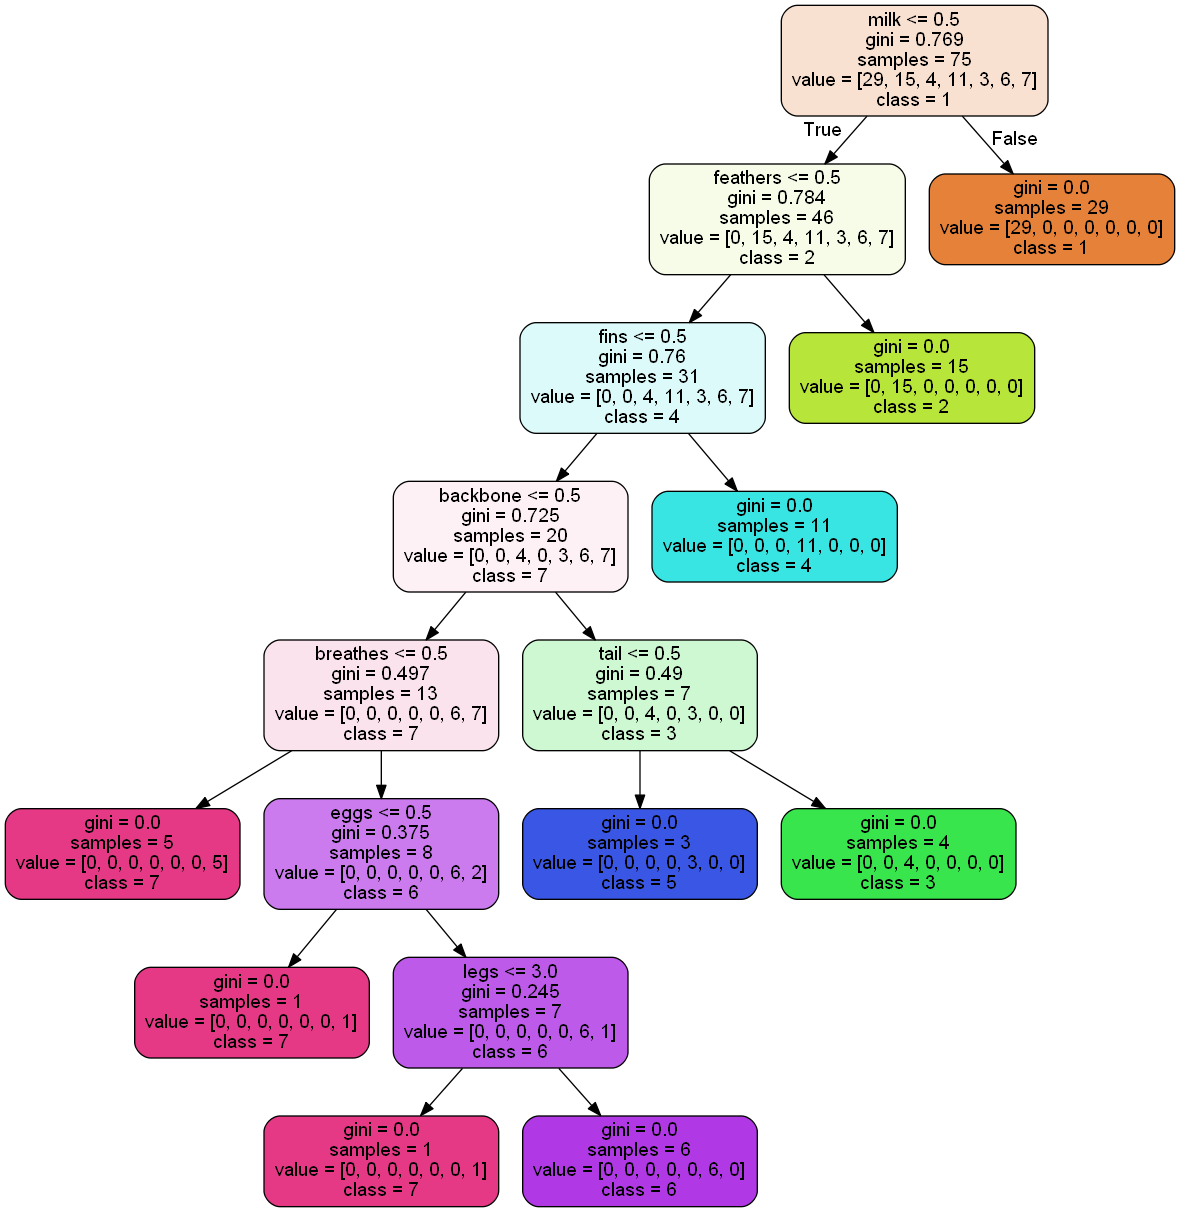

In [31]:
from sklearn.externals.six import StringIO
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,feature_names=x.columns,class_names=['1','2','3','4','5','6','7'])
graph=graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())